In [1]:
from os import listdir
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd
import numpy as np
import io
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
uploaded= files.upload()

df = pd.read_csv(io.BytesIO(uploaded['fraud_data.csv']))

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Saving fraud_data.csv to fraud_data.csv


In [3]:
lr = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = lr.predict(X_test)


lr = LogisticRegression(max_iter=1000).fit(X_train, y_train)
lr_proba = lr.predict_proba(X_test)[:,1]


precision, recall, thresholds = precision_recall_curve(y_test, lr_proba)

In [4]:
def precision_recall_calc(y_pred,y_actual):

  T_P = 0
  T_N = 0
  F_P = 0
  F_N = 0

  assert(len(y_pred) == len(y_actual)), 'Both arrays must be of same length'

  for idx,val in enumerate(list(zip(y_pred,y_actual))):

    if val[0] == val[1] == 1:

      T_P += 1

    elif val[0] == 1 and val[1] == 0:

      F_P += 1

    elif val[0] == 0 and val[1] == 1:

      F_N += 1

    else:

      T_N += 1
  
  try:
    precision = T_P / (T_P + F_P)

  except:
    precision = 1

  try:
    recall = T_P / (T_P + F_N)

  except:
    recall = 1 

  return precision, recall


precision_calc, recall_calc = precision_recall_calc(y_pred,y_test)

precision_sk, recall_sk  = (precision_score(y_test,y_pred), recall_score(y_test,y_pred))


print('Calculated Precision Score: {} and Recall Score: {}\n'.format(precision_calc,recall_calc))

print('Scikit Learn Precision Score: {} and Recall Score: {}'.format(precision_sk,recall_sk))

Calculated Precision Score: 0.9692307692307692 and Recall Score: 0.7875

Scikit Learn Precision Score: 0.9692307692307692 and Recall Score: 0.7875


In [5]:
def func_precision_recall_curve(y_pred_proba,y_actual):

  precision_scores = []

  recall_scores = []

  pred_threshold = np.linspace(0,1,3115)

  for threshold in pred_threshold:

    y_pred = []

    for prob in y_pred_proba:


      if prob >= threshold:

        y_pred.append(1)

      else:

        y_pred.append(0)


    precision_scores.append(precision_recall_calc(y_pred,y_actual)[0])

    recall_scores.append(precision_recall_calc(y_pred,y_actual)[1])


  return (precision_scores, recall_scores)
    

p_s_c, r_s_c = func_precision_recall_curve(lr_proba,y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


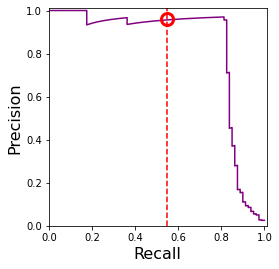

In [6]:
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(recall, precision, color='purple')
plt.axvline(x=0.55, color='r', linestyle='--')
plt.plot(0.55, 0.96, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


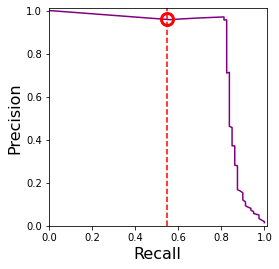

In [7]:
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(r_s_c, p_s_c, color='purple')
plt.axvline(x=0.55, color='r', linestyle='--')
plt.plot(0.55, 0.96, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()